# Token series

In [1]:
from lint.models import Token

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [46]:
def plot_token_series(token, figsize=(8, 4)):
    
    gail = Token.token_series(token, corpus='gail')
    chicago = Token.token_series(token, corpus='chicago')
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    plt.title('Offset-binned token counts')
    plt.tight_layout(w_pad=3)

    ax1.set_title('Gail')
    ax1.plot(*zip(*gail.items()))

    ax2.set_title('Chicago')
    ax2.plot(*zip(*chicago.items()))

    print(token)
    plt.show()

the


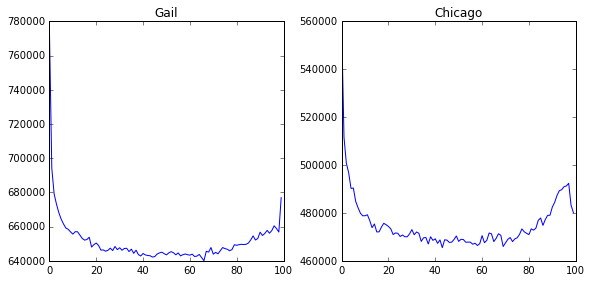

In [66]:
plot_token_series('the')

# Chi-squared

So, how to test if the observed distribution of a word is significantly different from the expectation, the box distribution?

In [8]:
import numpy as np
from scipy.stats import chisquare

def ts_chisquare(token):
    
    # Get the raw token series.
    series = Token.token_series(token)
    
    # By default, 0s in all bins.
    f_obs = np.zeros(100)
    
    # Fill the array with the observed values.
    for offset, count in series.items():
        f_obs[offset] = count
        
    total_count = np.sum(f_obs)
    
    # Compare to the box distribution.
    f_exp = np.full(100, total_count/100)
    
    return chisquare(f_obs, f_exp)

In [55]:
import pandas as pd

from wordfreq import top_n_list

tokens = top_n_list('en', 1000, ascii_only=True)

data = []
for token in tokens:
    chi, p = ts_chisquare(token)
    data.append((token, chi, p))

project


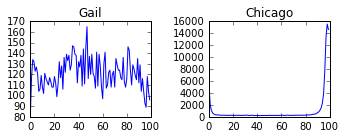

http


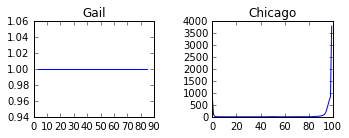

you


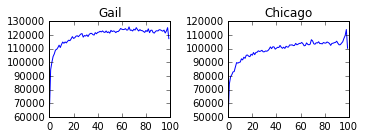

a


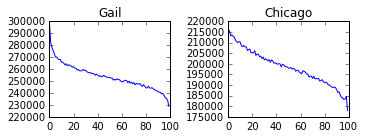

i


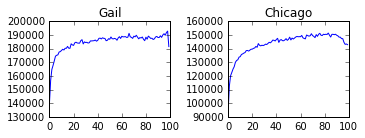

of


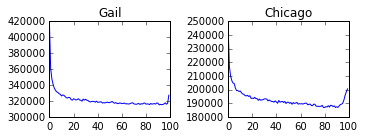

works


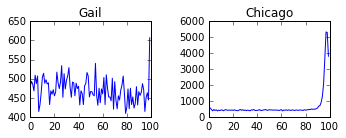

the


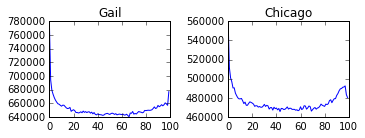

online


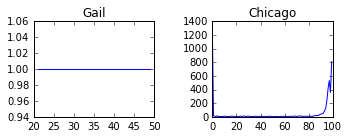

years


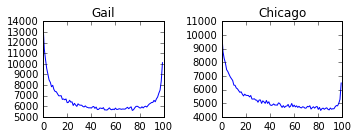

said


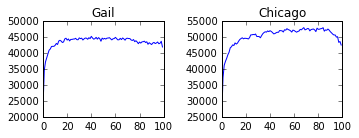

me


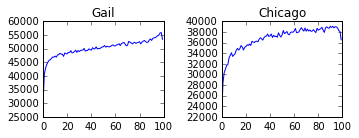

including


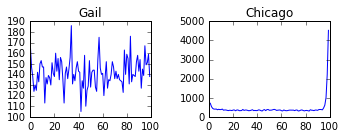

she


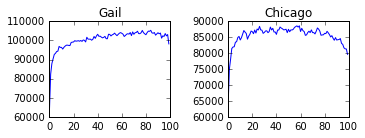

him


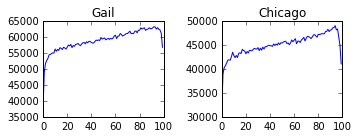

he


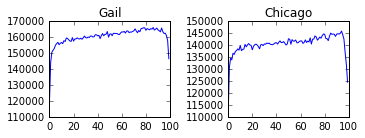

e


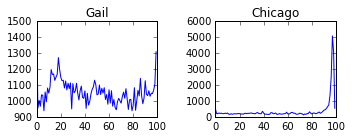

young


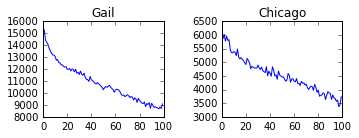

terms


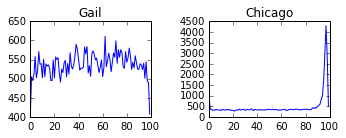

to


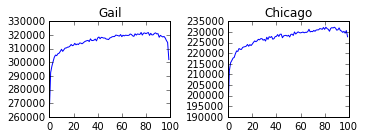

love


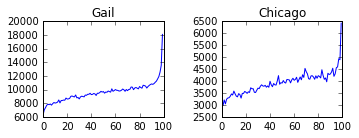

states


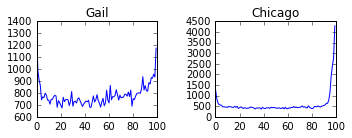

will


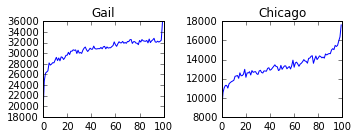

ii


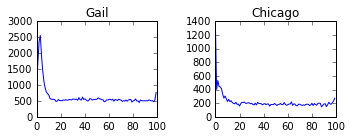

school


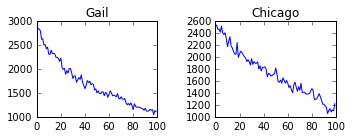

do


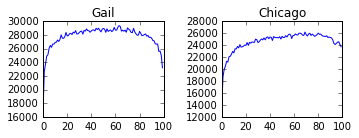

what


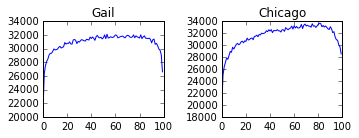

father


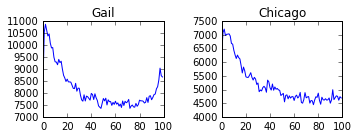

that


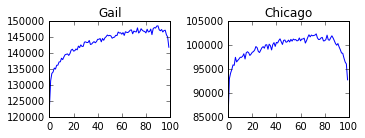

mother


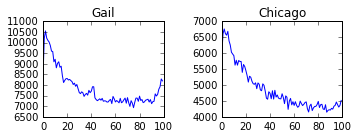

have


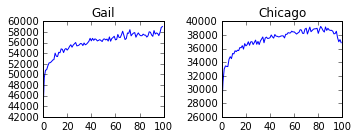

it


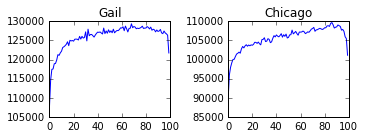

hair


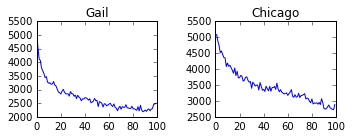

we


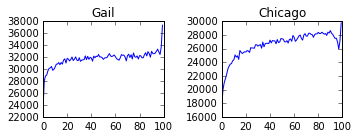

end


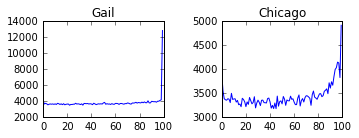

age


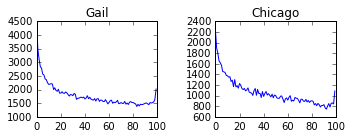

not


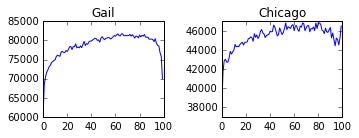

death


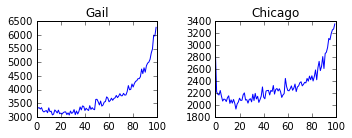

god


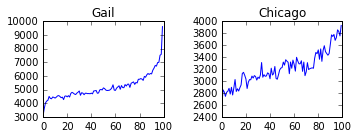

year


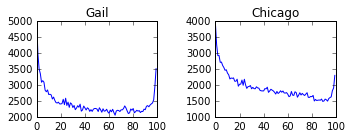

know


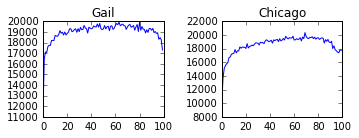

your


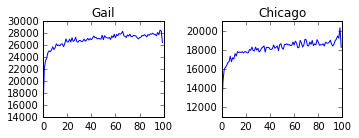

f


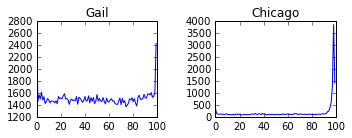

united


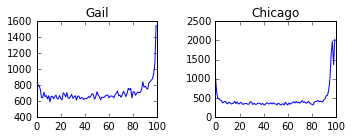

her


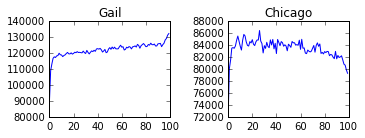

provide


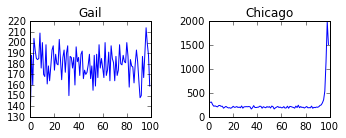

now


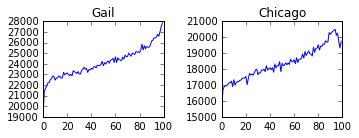

happy


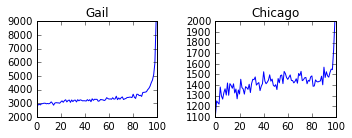

life


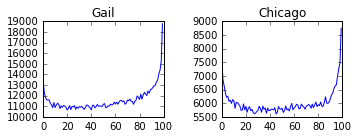

think


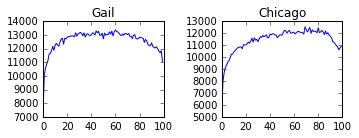

if


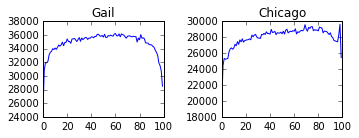

an


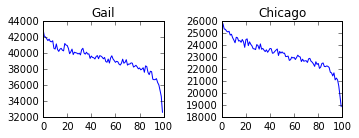

dead


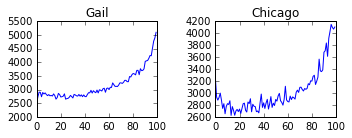

can


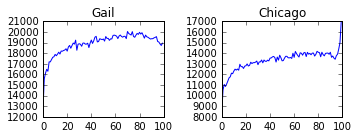

dont


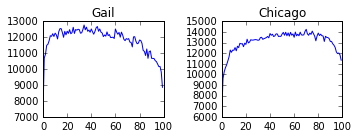

boy


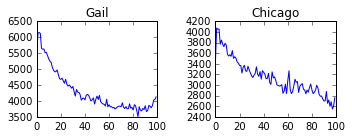

and


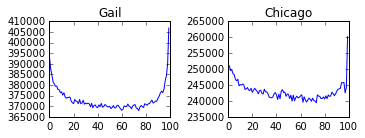

old


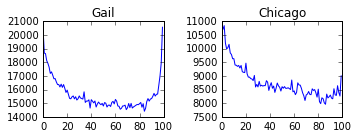

work


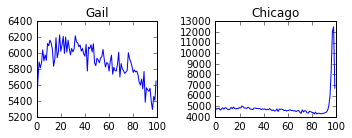

blue


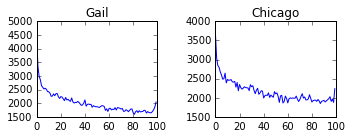

again


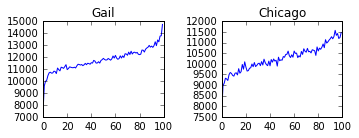

family


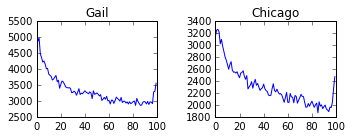

site


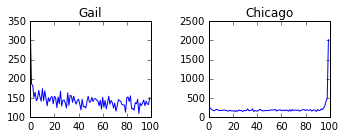

would


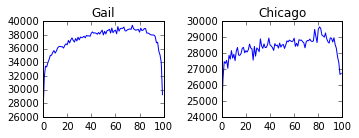

miss


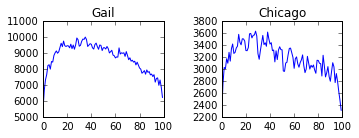

new


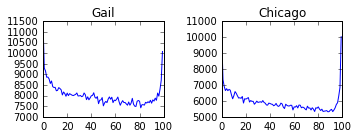

girls


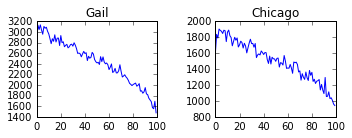

college


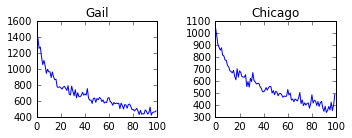

tell


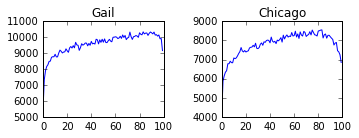

told


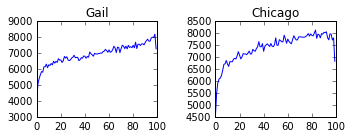

large


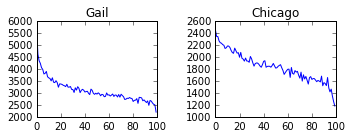

small


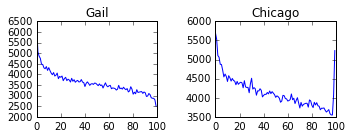

section


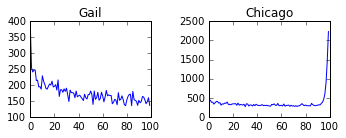

girl


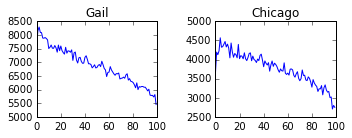

did


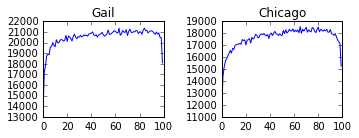

heart


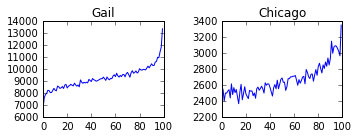

could


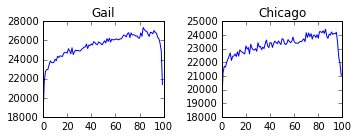

which


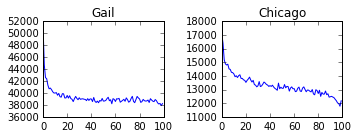

posted


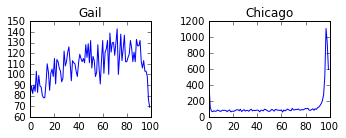

was


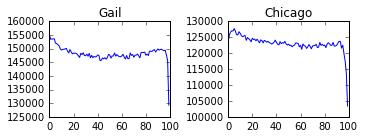

in


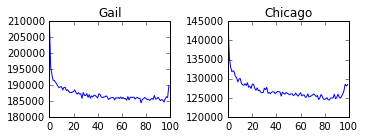

or


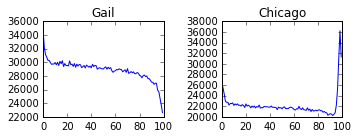

kill


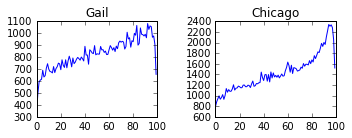

go


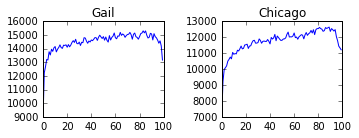

mr


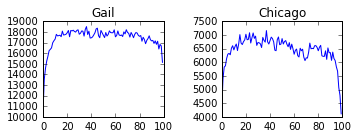

be


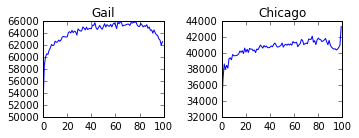

has


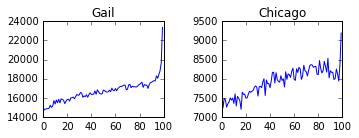

asked


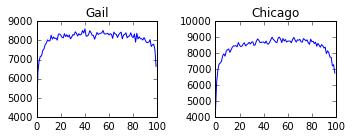

always


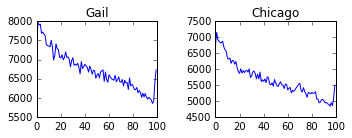

information


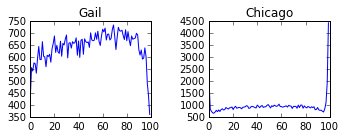

die


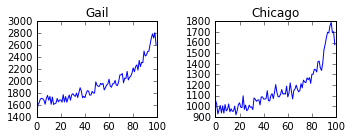

like


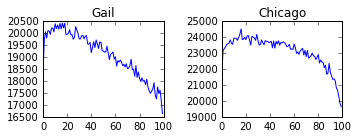

then


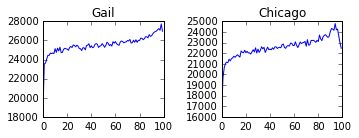

shall


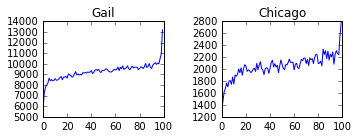

n't


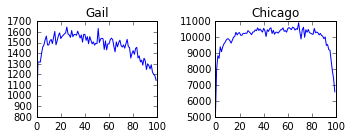

killed


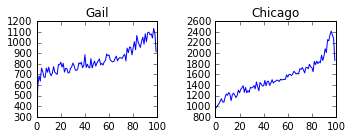

black


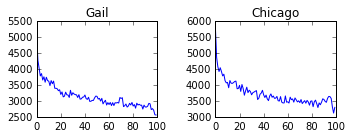

is


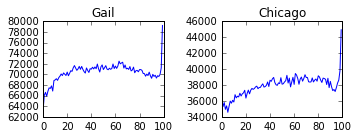

boys


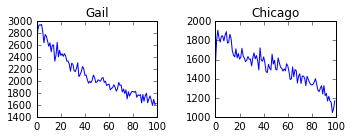

must


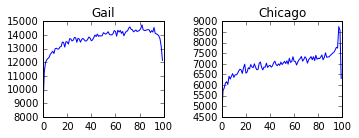

In [56]:
df = pd.DataFrame(data, columns=('token', 'chi', 'p'))

df.sort_values('chi', ascending=False, inplace=True)

for i, (token, chi, p) in df.head(100).iterrows():
    plot_token_series(token, (5,2))

# Notes

- "is" - That spike at the end looks real, not just a Chicago artifact?
- "blue" and "black" mark beginnings? What about other colors?
- "was" vs. "is" look like inverses - "is" spikes at the end, "was" dives, and the middles looks like mirror images too.
- "large" and "small" both decrease.
- "know" and "think" both seem to peak in the middle - mental states?
- "hair" - ???
- "mother" and "father" - spike at 40%, for both?